In [1]:
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kimgeonyu","key":"bfbdcd7b31bc168eddfae4e56bc4590e"}'}

In [2]:
# #json 파일 이동시키기.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning 방지
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 22.7MB/s]


In [4]:
!unzip /content/titanic.zip

Archive:  /content/titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
data = pd.read_csv("/content/train.csv")


In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

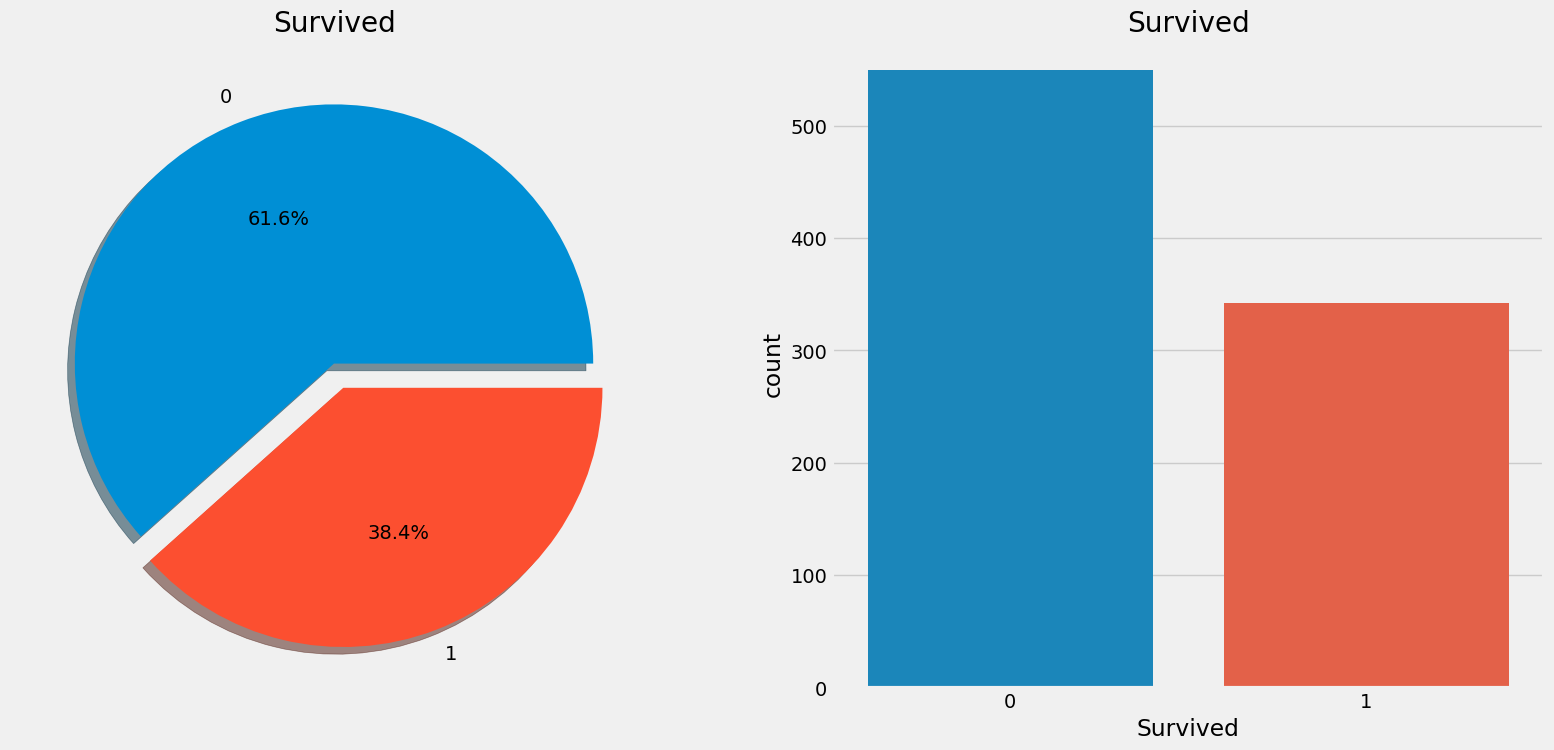

In [9]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data["Survived"].value_counts().plot.pie(explode=[0,0.1], autopct="%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title("Survived")
ax[0].set_ylabel("")
sns.countplot(x="Survived", data=data, ax=ax[1])
ax[1].set_title("Survived")
plt.show()

In [10]:
data.groupby(["Sex", "Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

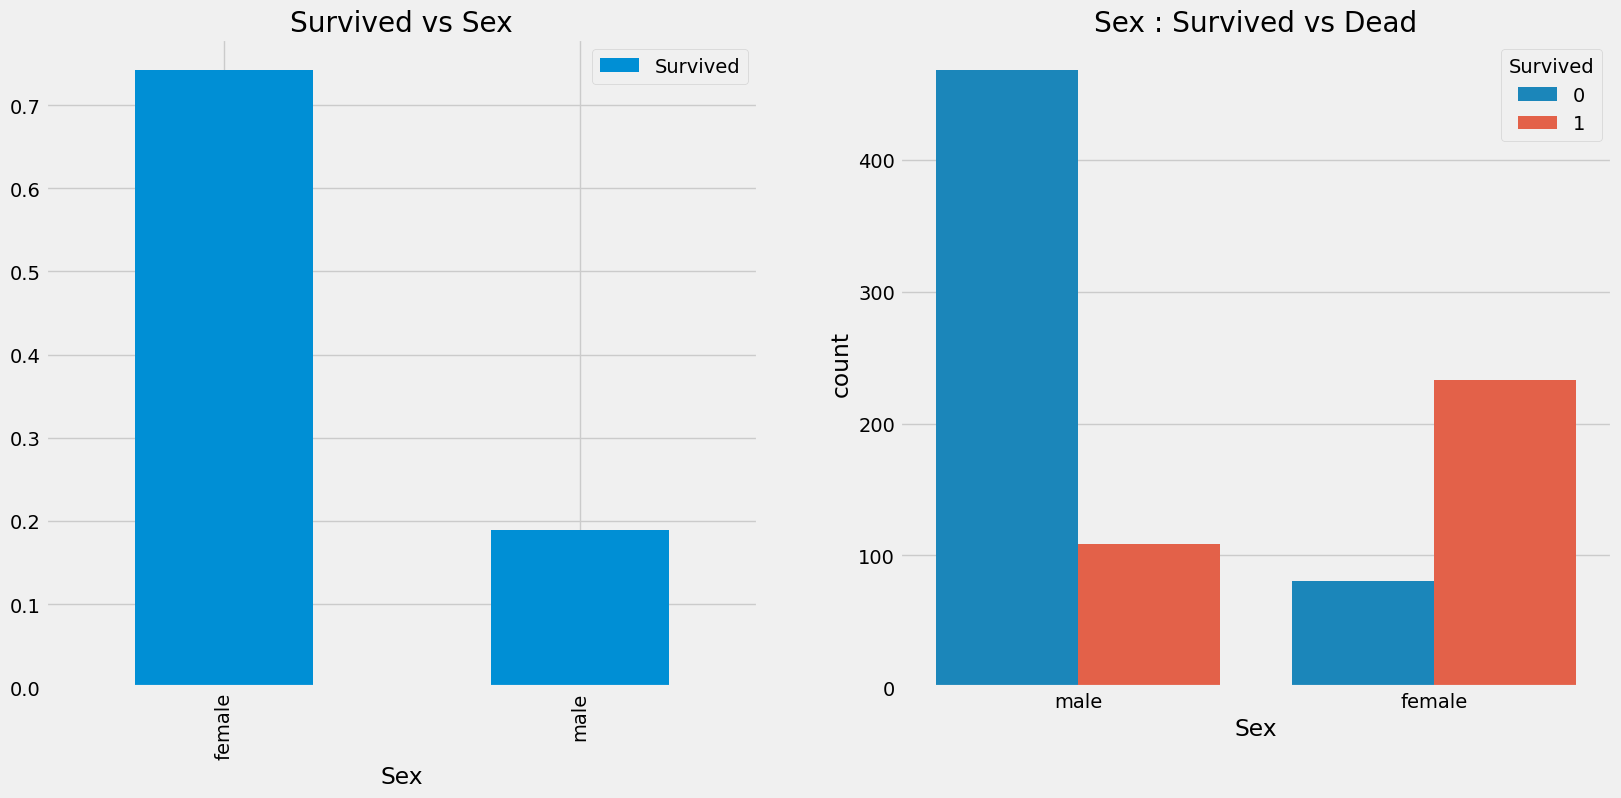

In [11]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data[["Sex", "Survived"]].groupby(["Sex"]).mean().plot.bar(ax=ax[0])
ax[0].set_title("Survived vs Sex")
sns.countplot(x="Sex", hue= "Survived", data =data, ax=ax[1])
ax[1].set_title("Sex : Survived vs Dead")
plt.show()

In [12]:
pd.crosstab(data.Pclass, data.Survived, margins = True).style.background_gradient(cmap="summer_r")

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


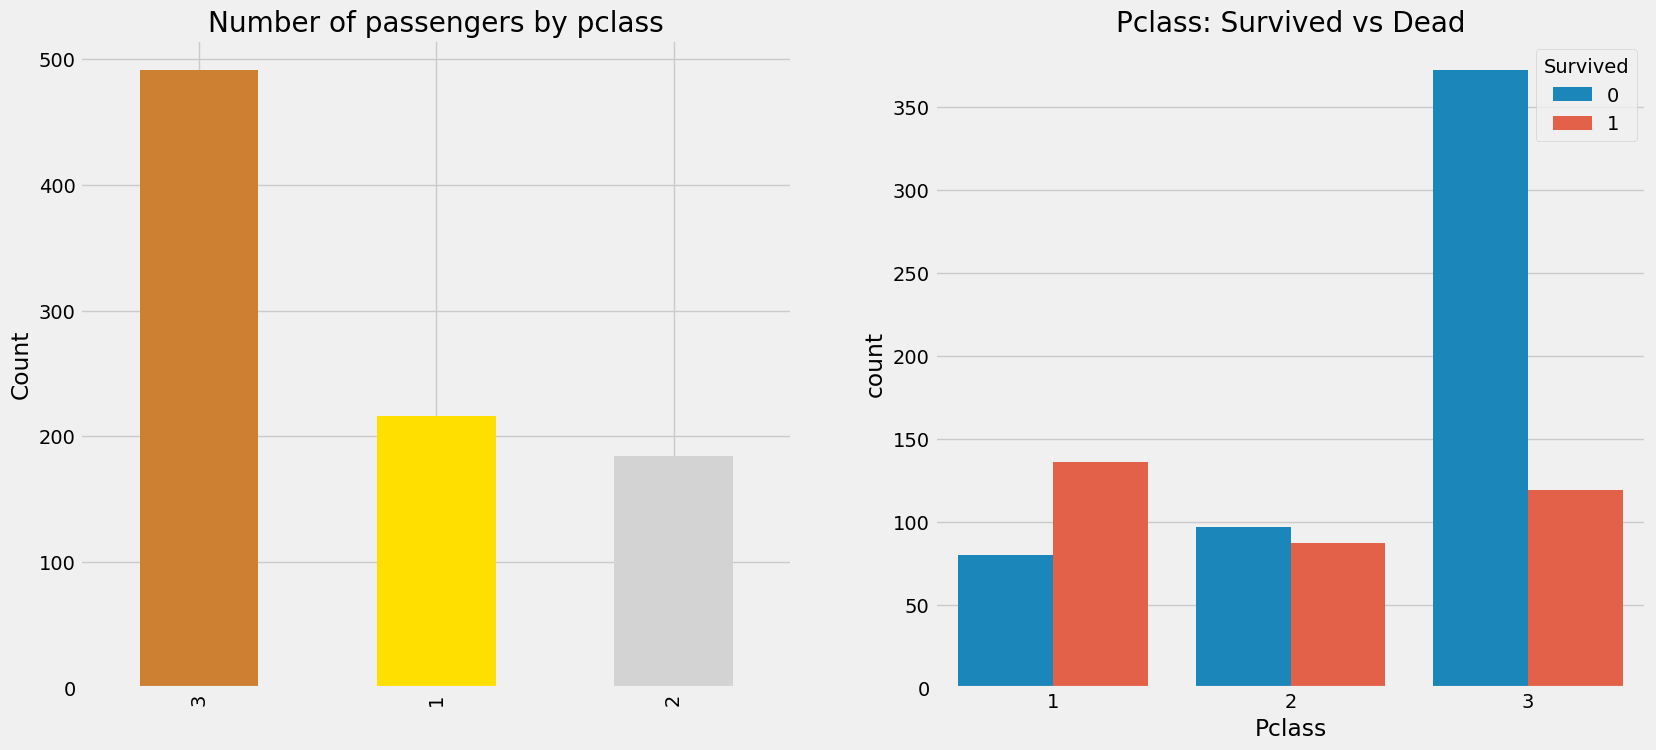

In [13]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data["Pclass"].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax= ax[0])
ax[0].set_title("Number of passengers by pclass")
ax[0].set_ylabel("Count")
sns.countplot(x="Pclass", hue="Survived", data = data, ax=ax[1])
ax[1].set_title("Pclass: Survived vs Dead")
plt.show()

In [14]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap= "summer_r")

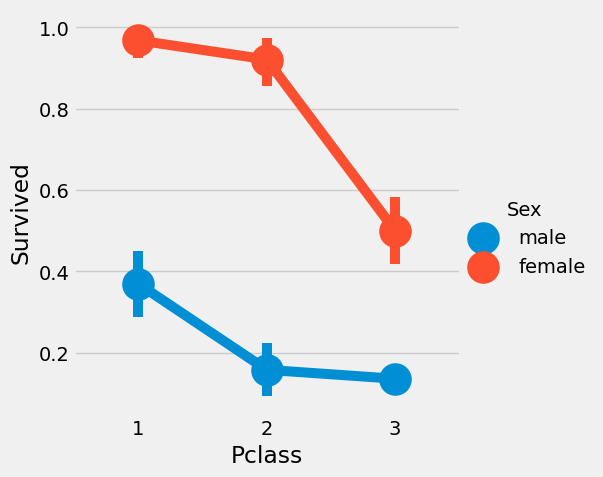

In [16]:
sns.catplot(x="Pclass", y="Survived", hue = "Sex", data =data, kind='point')
plt.show()

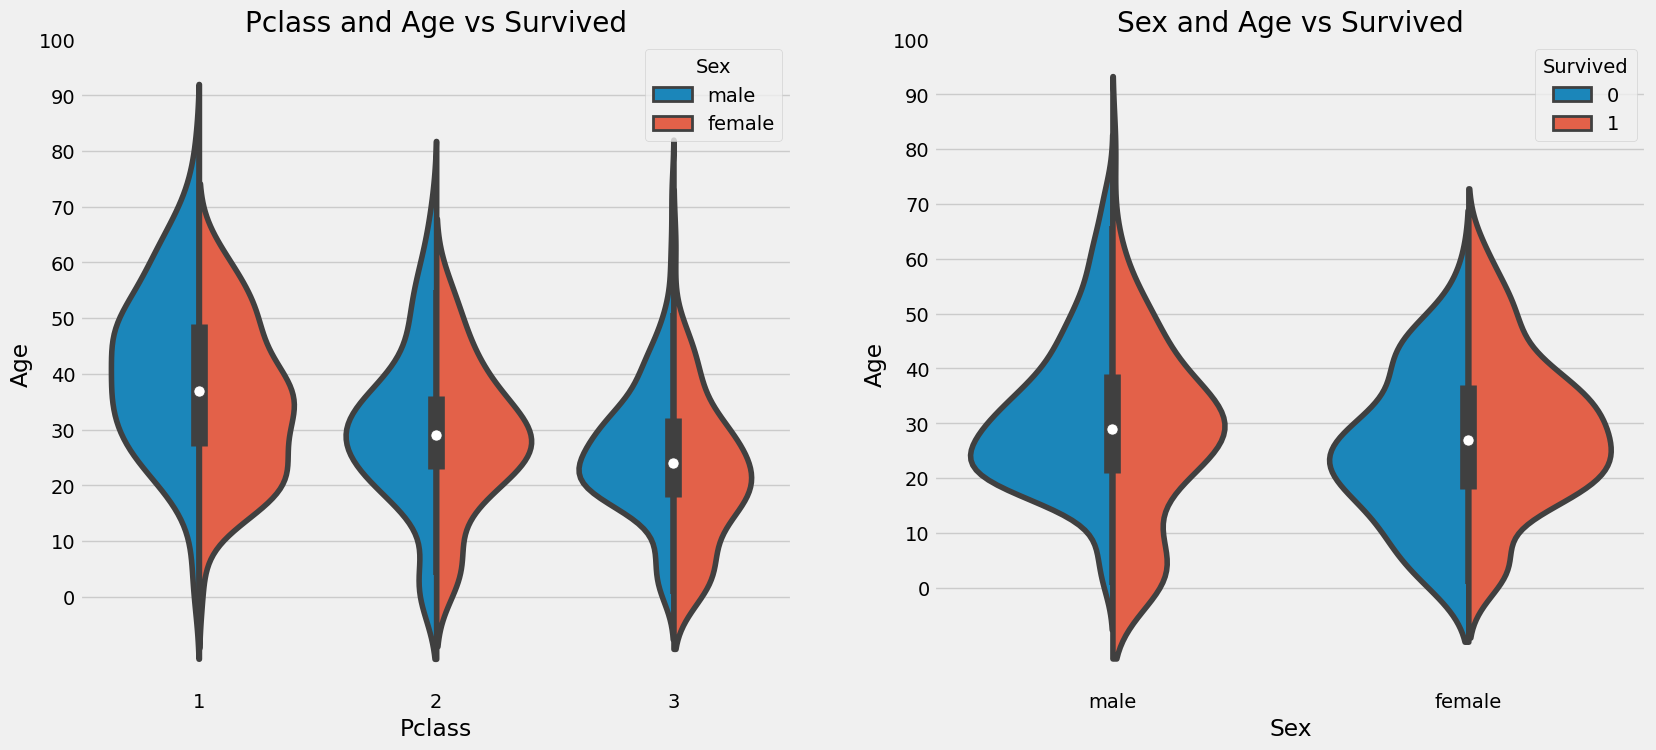

In [17]:
f,ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass", y = "Age", hue = "Sex", data = data, split = True, ax= ax[0])
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0,110,10))

sns.violinplot(x="Sex", y = "Age", hue = "Survived", data = data, split = True, ax= ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0,110,10))

In [18]:
data["Initial"] = 0
for i in data:
  data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [19]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap="summer_r")

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [20]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [21]:
data.groupby("Initial")["Age"].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [22]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [23]:
data.Age.isnull().any()

False

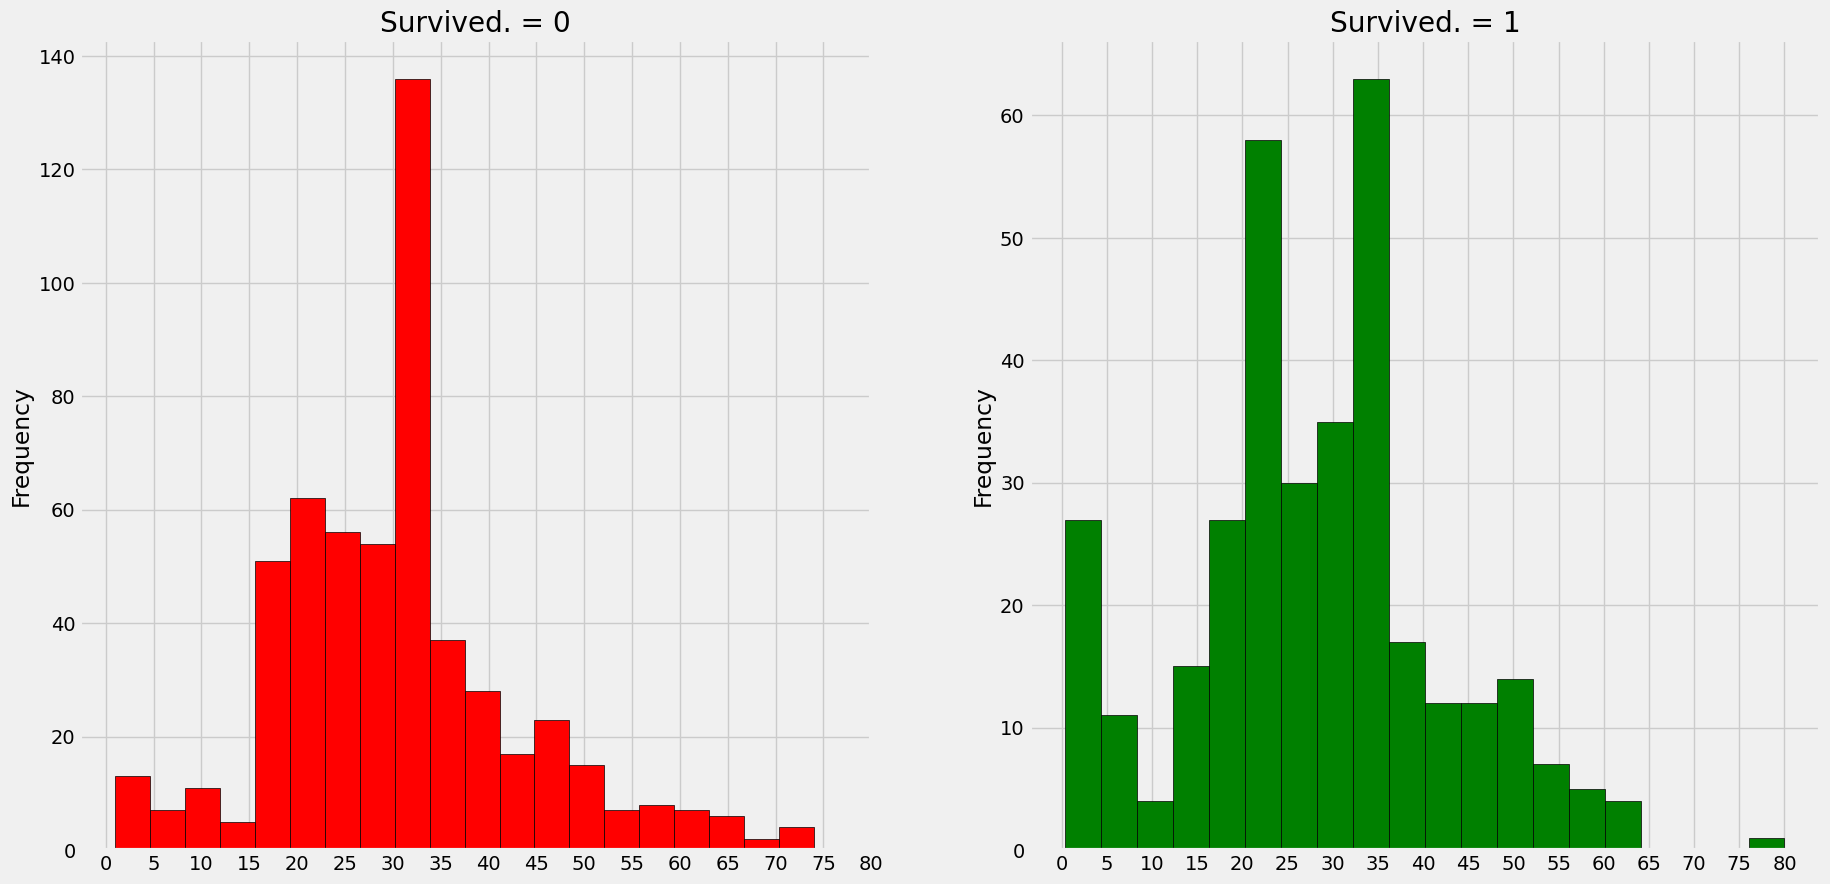

In [24]:
f,ax = plt.subplots(1,2,figsize=(20,10))
data[data["Survived"] == 0].Age.plot.hist(ax=ax[0], bins = 20, edgecolor="black", color = "red")
ax[0].set_title("Survived. = 0")
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)

data[data["Survived"] == 1].Age.plot.hist(ax=ax[1], bins = 20, edgecolor="black", color = "green")
ax[1].set_title("Survived. = 1")
x2 = list(range(0,85,5))
ax[1].set_xticks(x2)

plt.show()


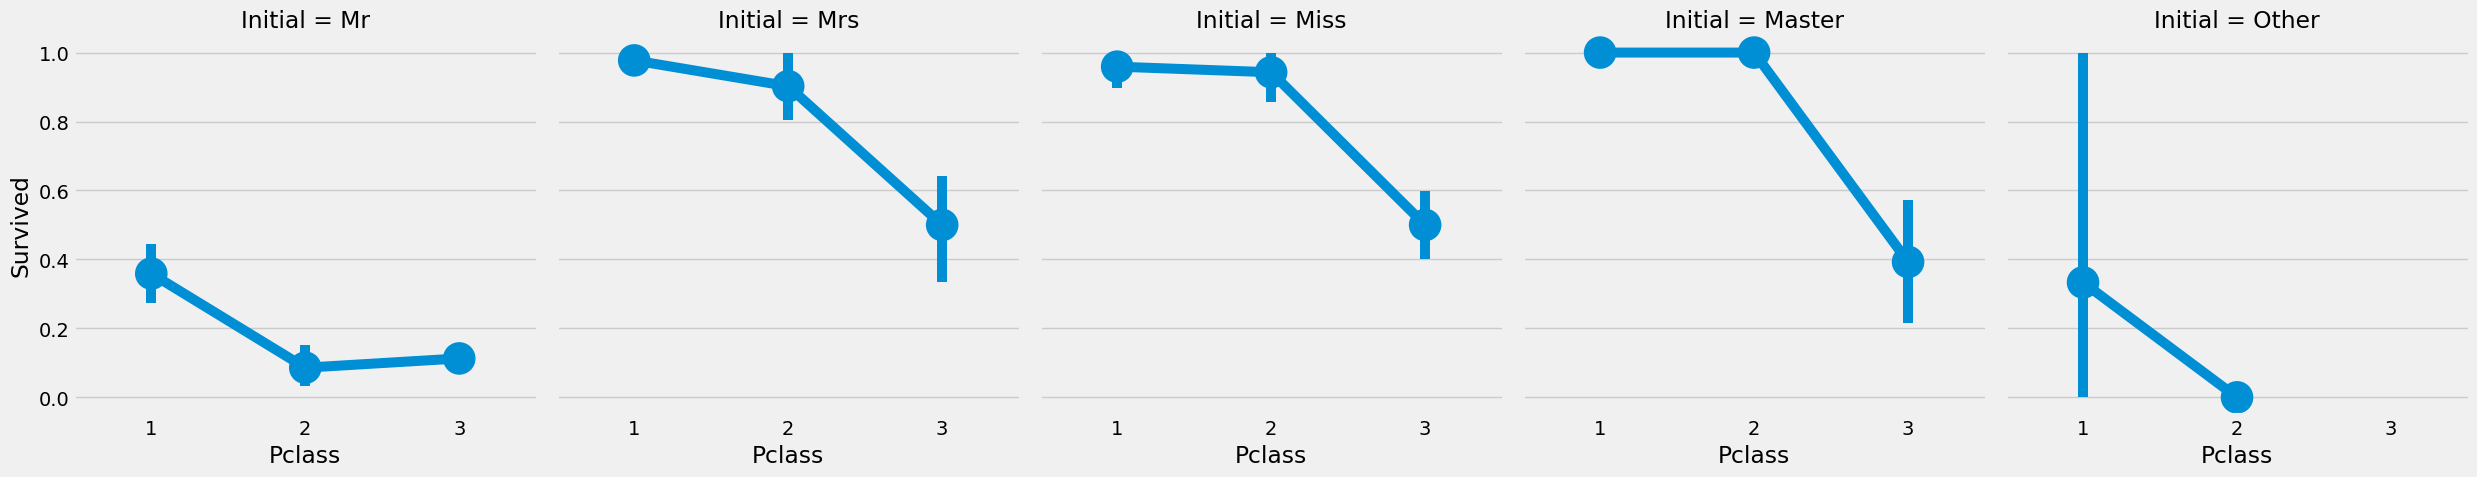

In [27]:
sns.catplot(x="Pclass", y="Survived", col="Initial", data = data, kind = "point")
plt.show()

In [28]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins = True).style.background_gradient(cmap = "summer_r")

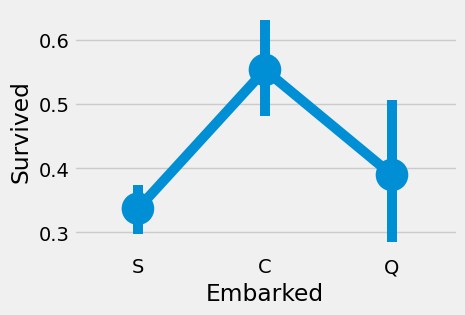

In [30]:
sns.catplot(x="Embarked", y = "Survived", data = data, kind='point')
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

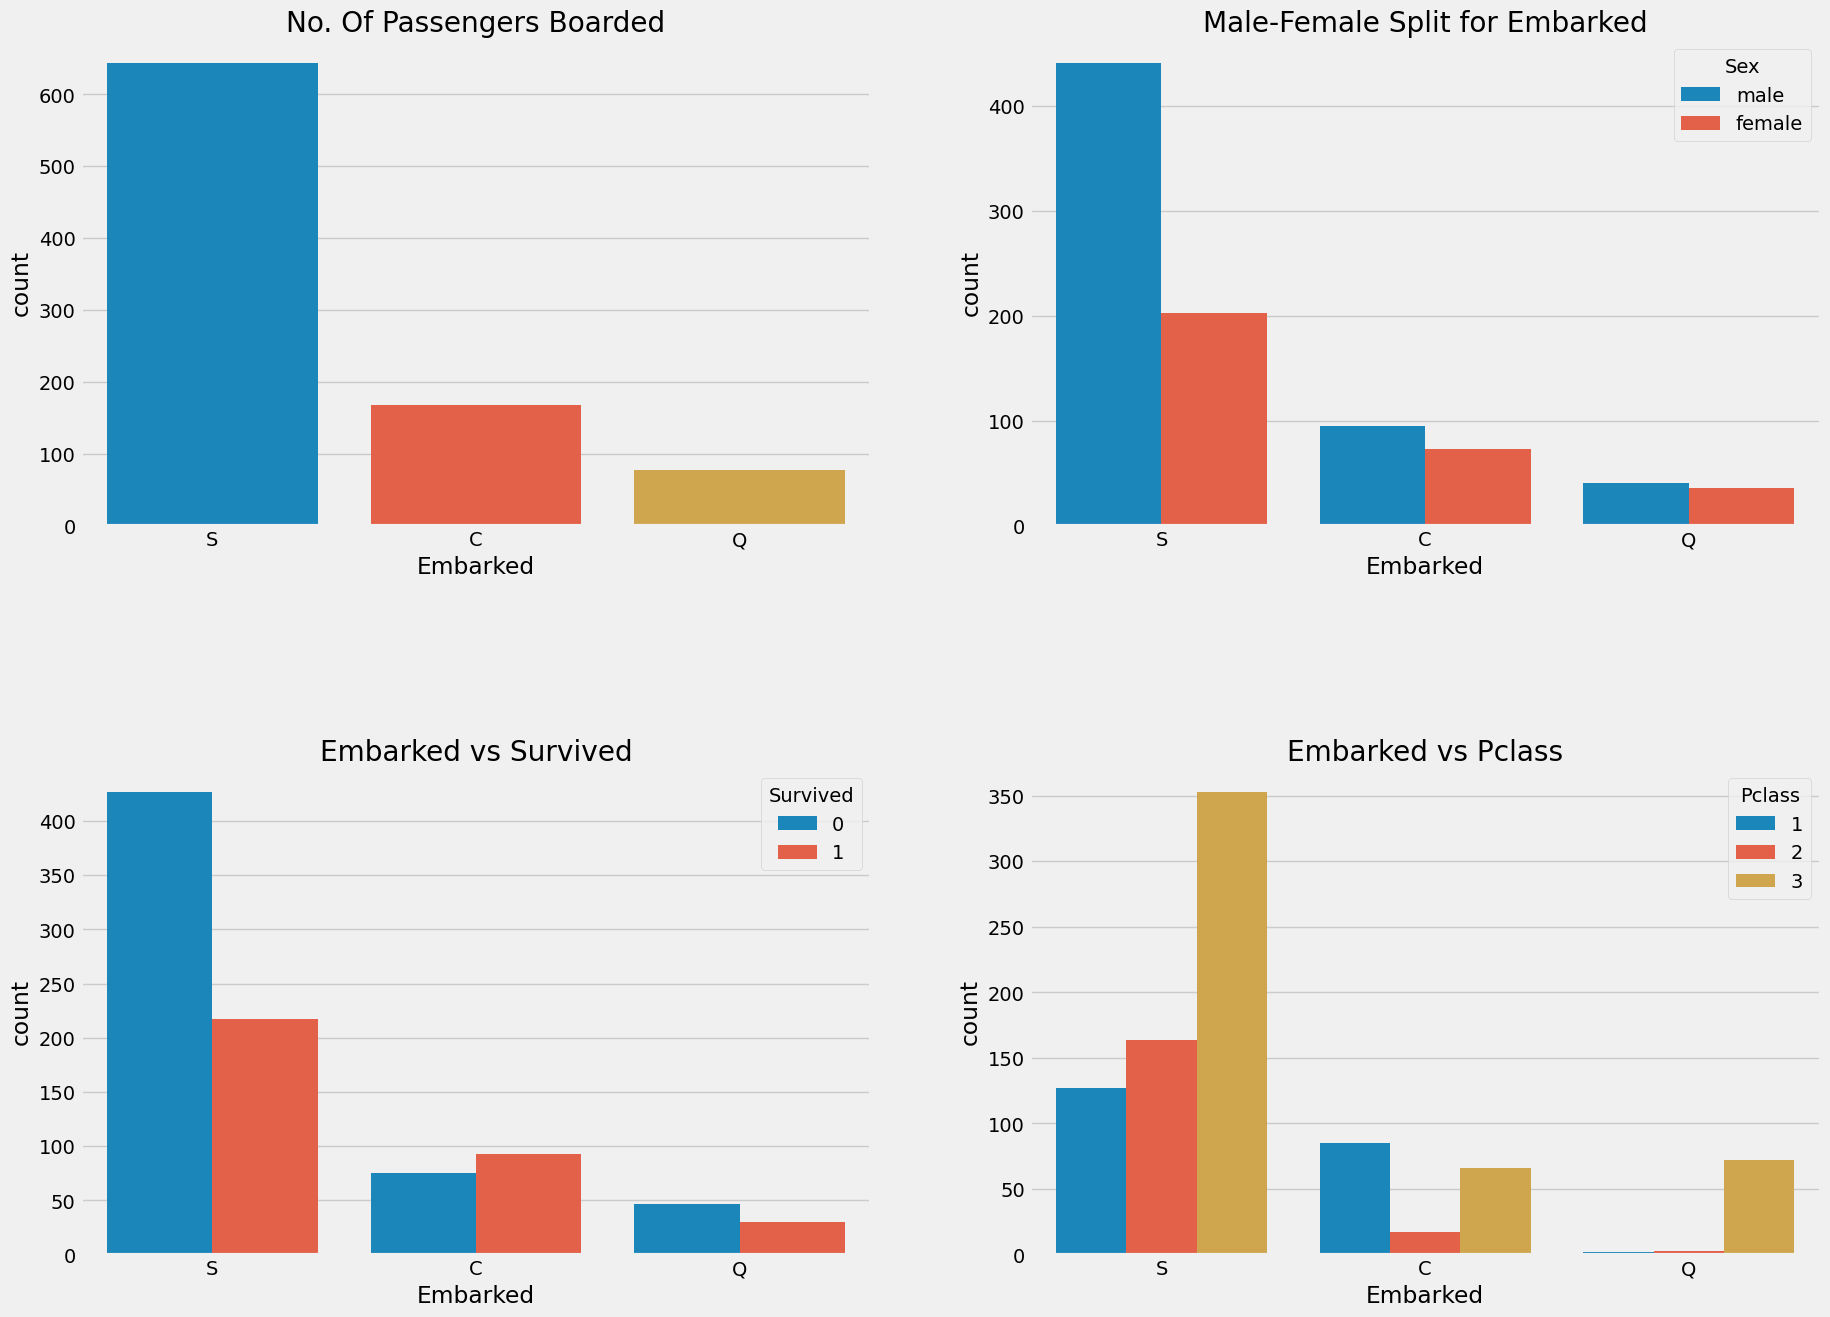

In [38]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x = 'Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(x='Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x = 'Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x = 'Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

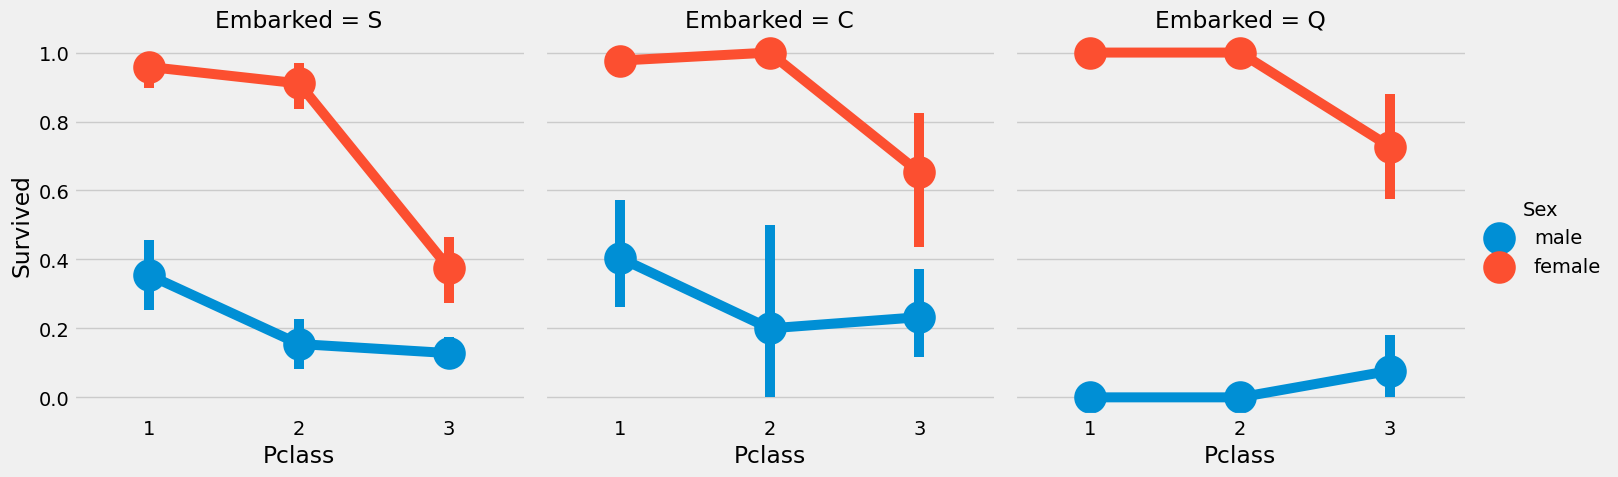

In [46]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=data, kind='point')
plt.show()

In [47]:
data["Embarked"].fillna("S", inplace= True)

In [48]:
data.Embarked.isnull().any()

False

In [49]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap="summer_r")

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


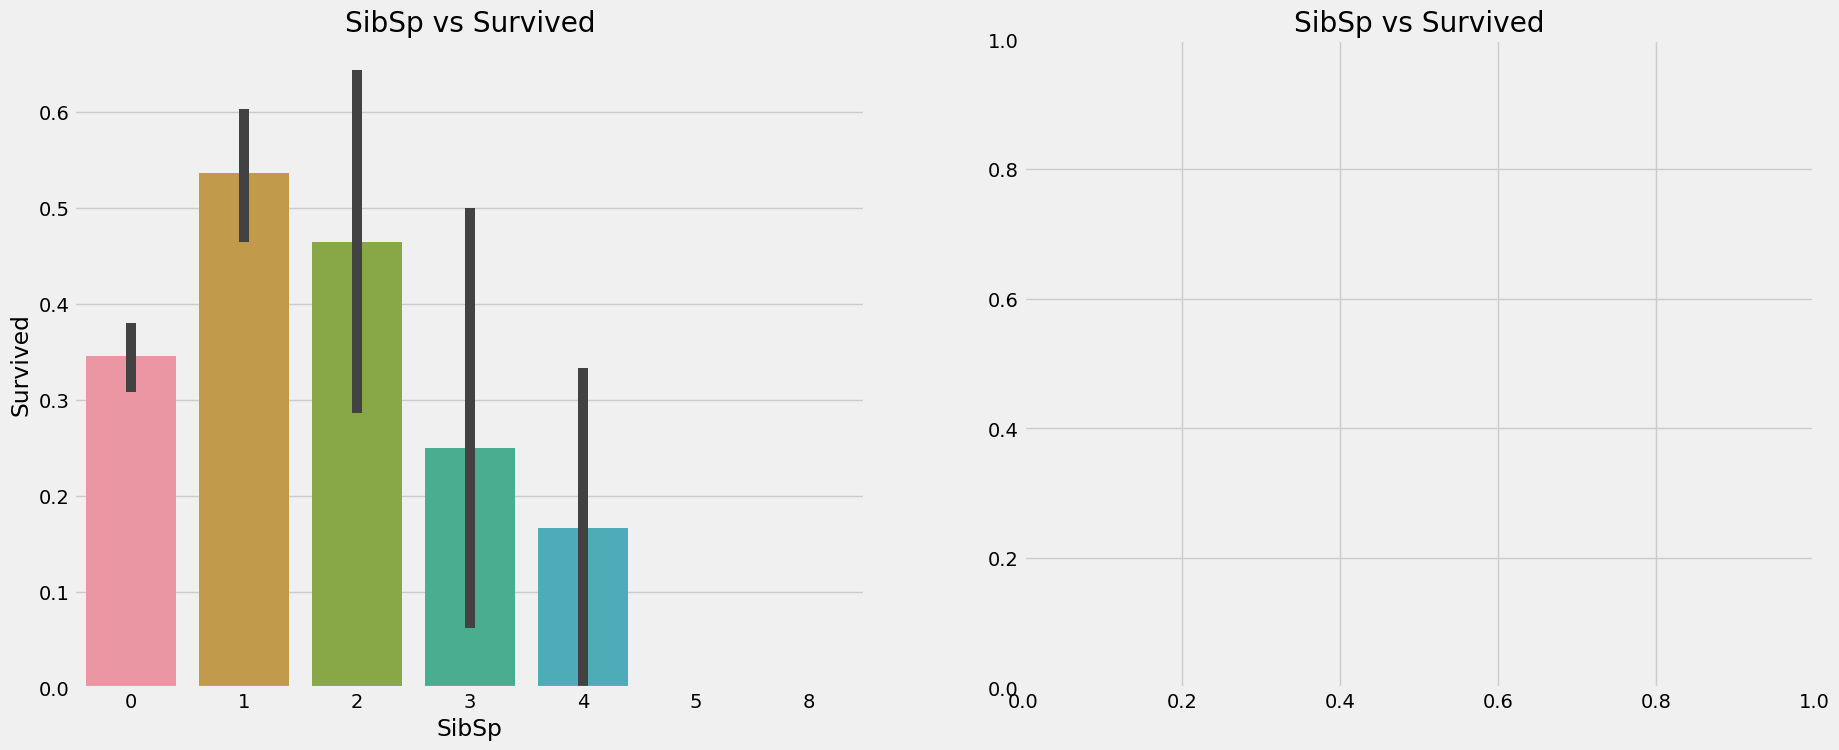

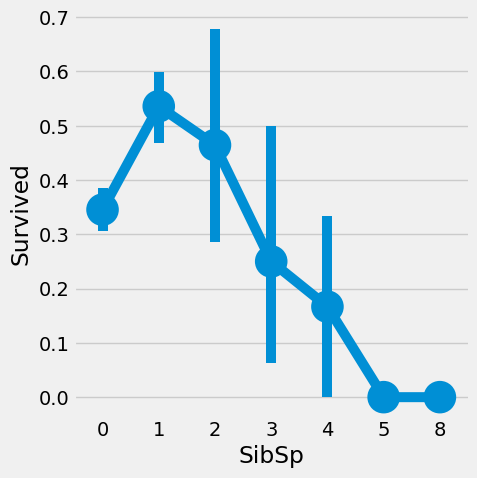

In [52]:
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot(x= "SibSp", y="Survived", data=data, ax=ax[0])
ax[0].set_title("SibSp vs Survived")

sns.catplot(x= "SibSp", y= "Survived", data =data, ax=ax[1], kind= 'point')
ax[1].set_title("SibSp vs Survived")

plt.show()

In [53]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap="summer_r")

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [54]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap="summer_r")

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


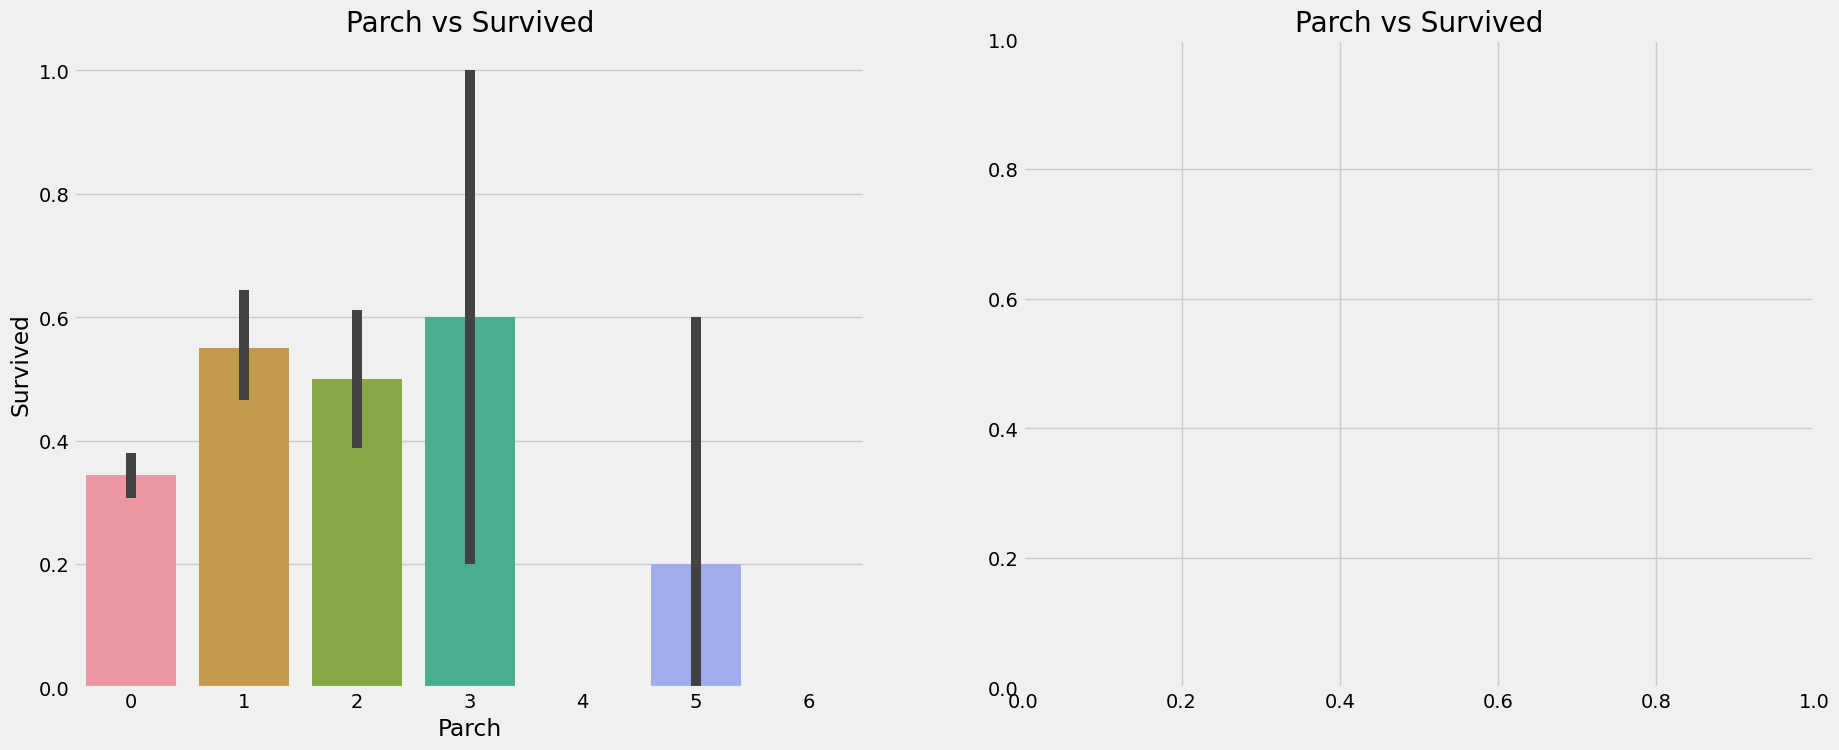

In [56]:
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot(x= "Parch", y = "Survived", data= data, ax=ax[0])
ax[0].set_title("Parch vs Survived")

sns.catplot(x= "Parch", y = "Survived", data = data, ax=ax[1], kind='point')
ax[1].set_title("Parch vs Survived")
plt.close(2)
plt.show()

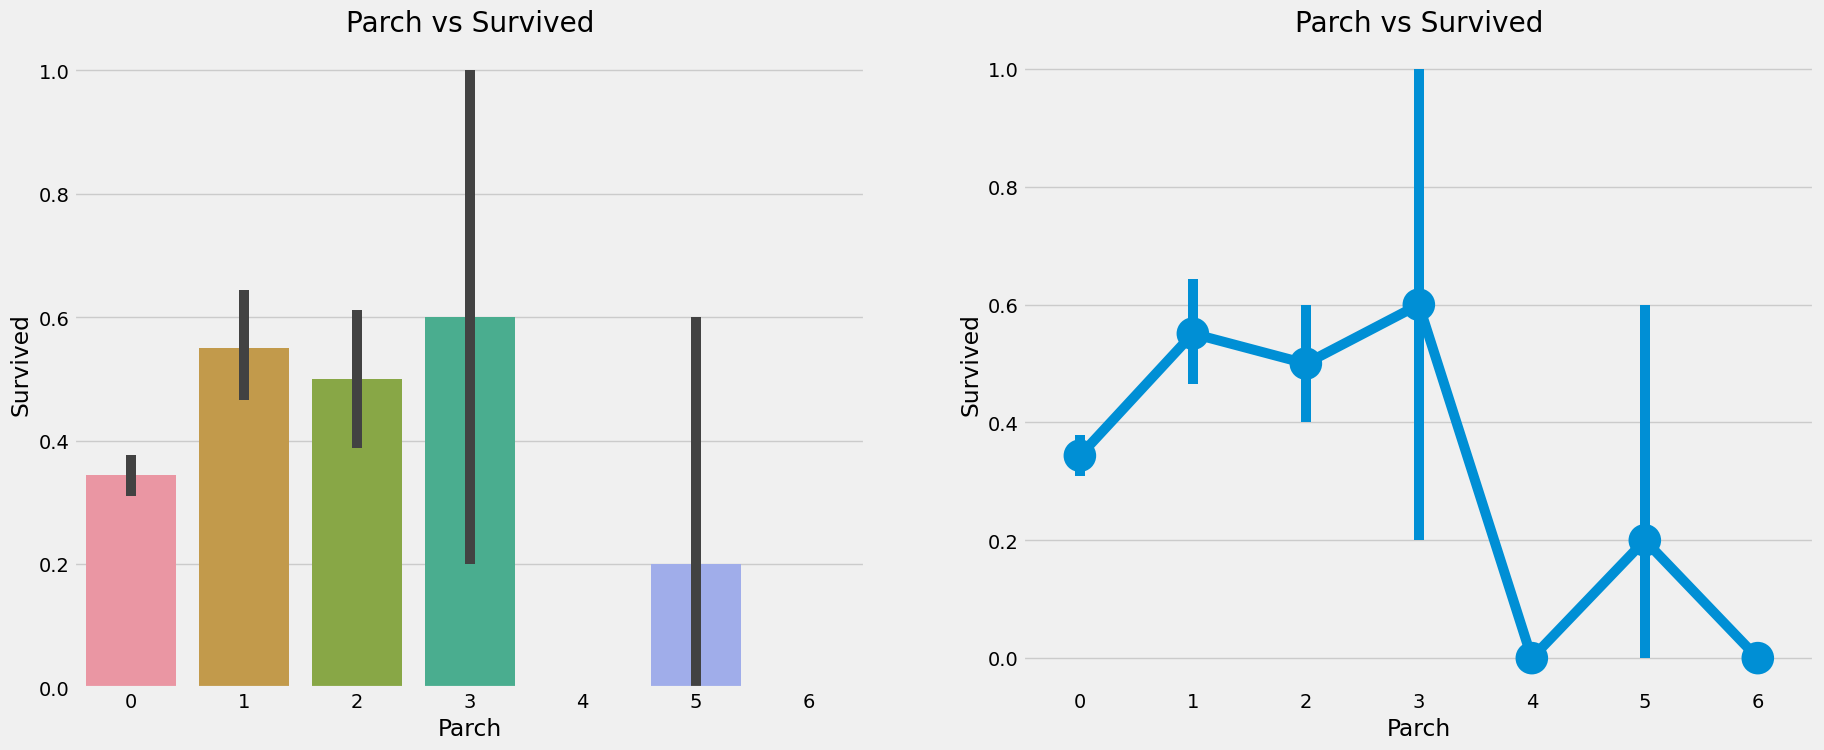

In [60]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot(x='Parch', y='Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.pointplot(x='Parch', y='Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.close(2)
plt.show()

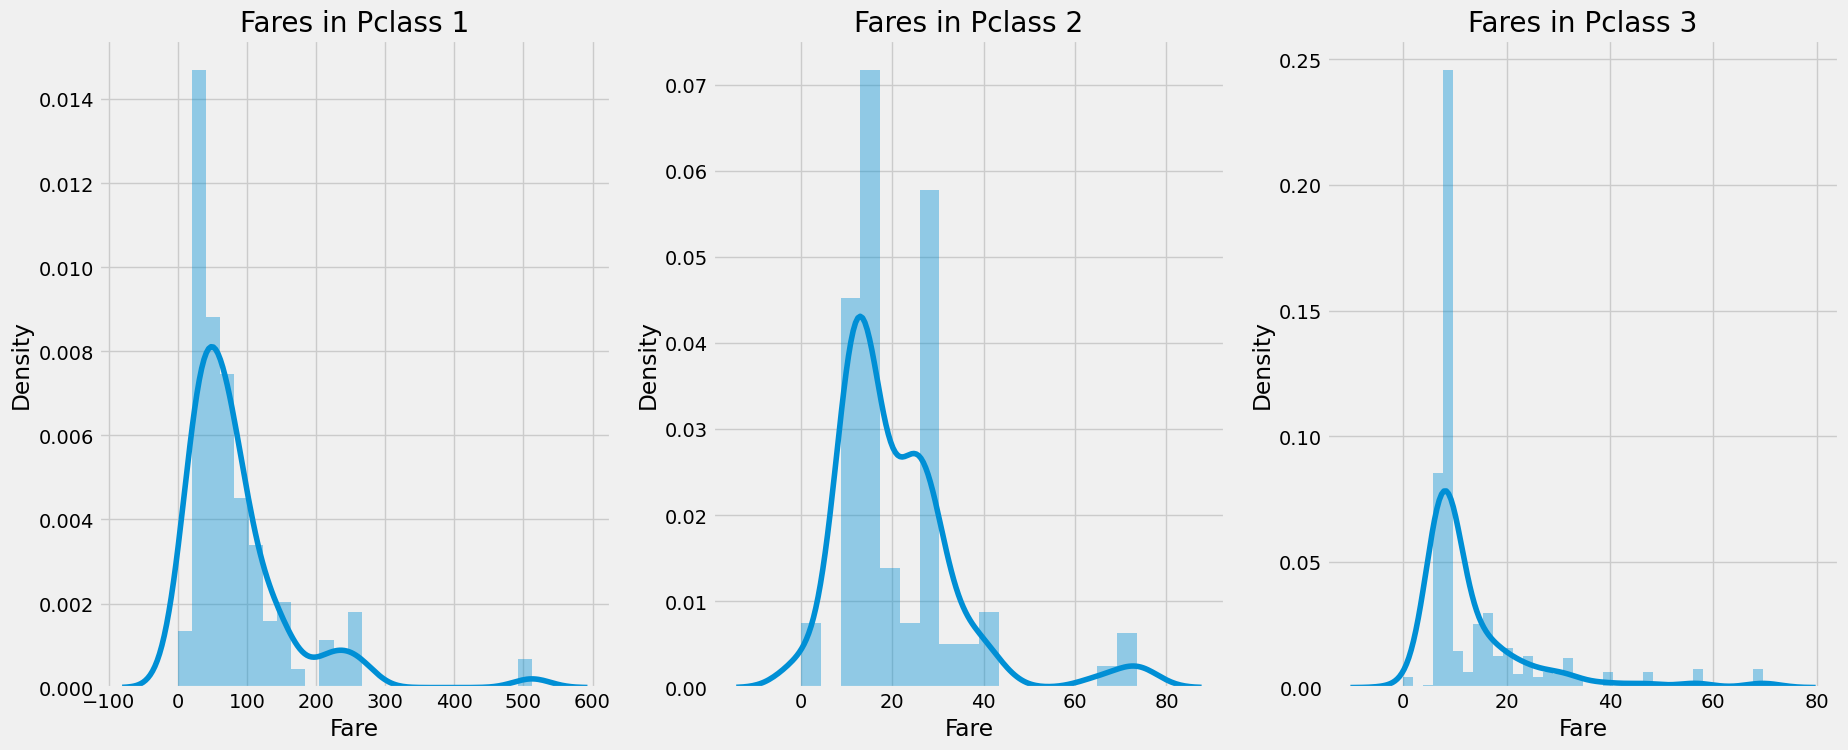

In [61]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

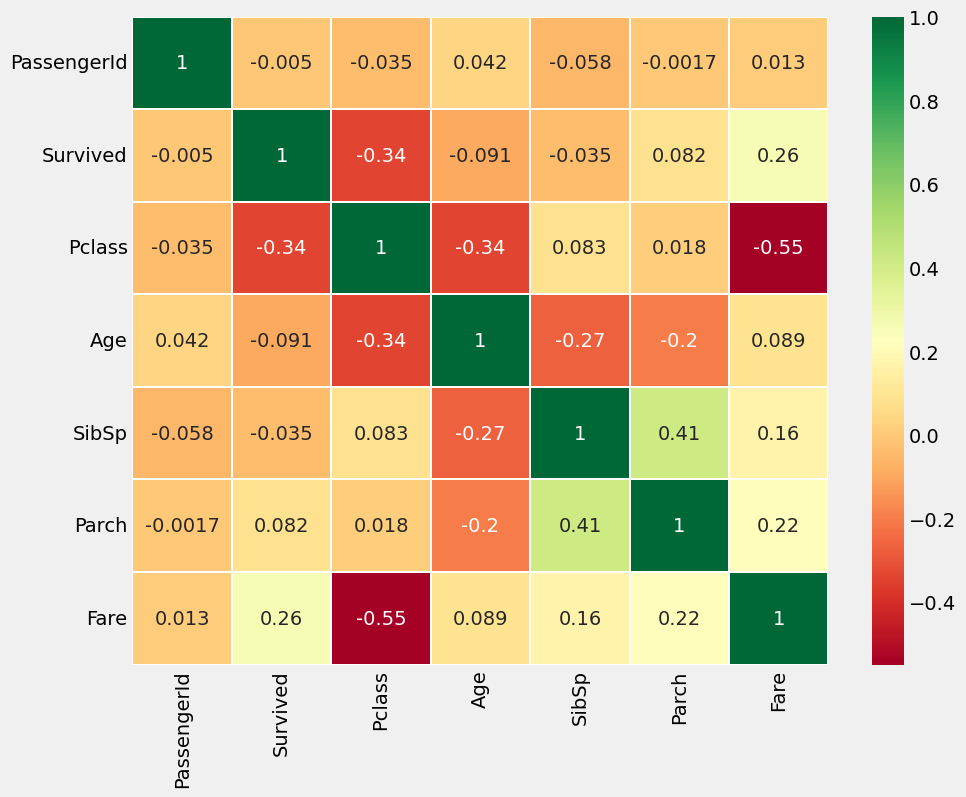

In [62]:
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", linewidth=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [63]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [64]:
data["Age_band"].value_counts().to_frame().style.background_gradient(cmap="summer")

,Age_band
1,382
2,325
0,104
3,69
4,11


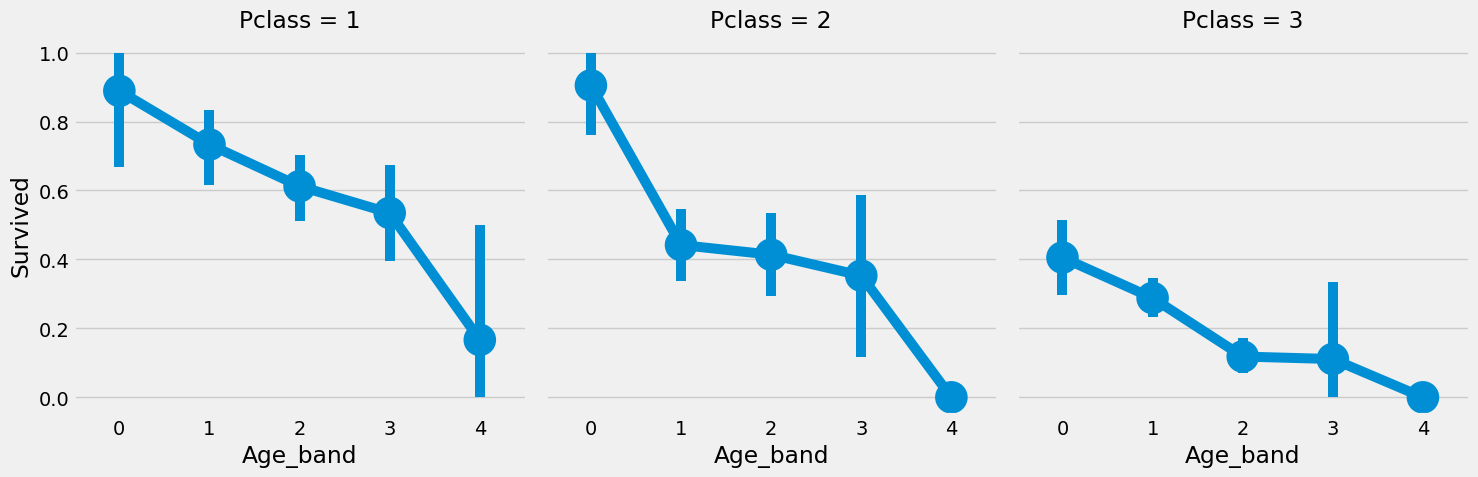

In [67]:
sns.catplot(x ="Age_band", y= "Survived", data = data, col="Pclass", kind="point")
plt.show()

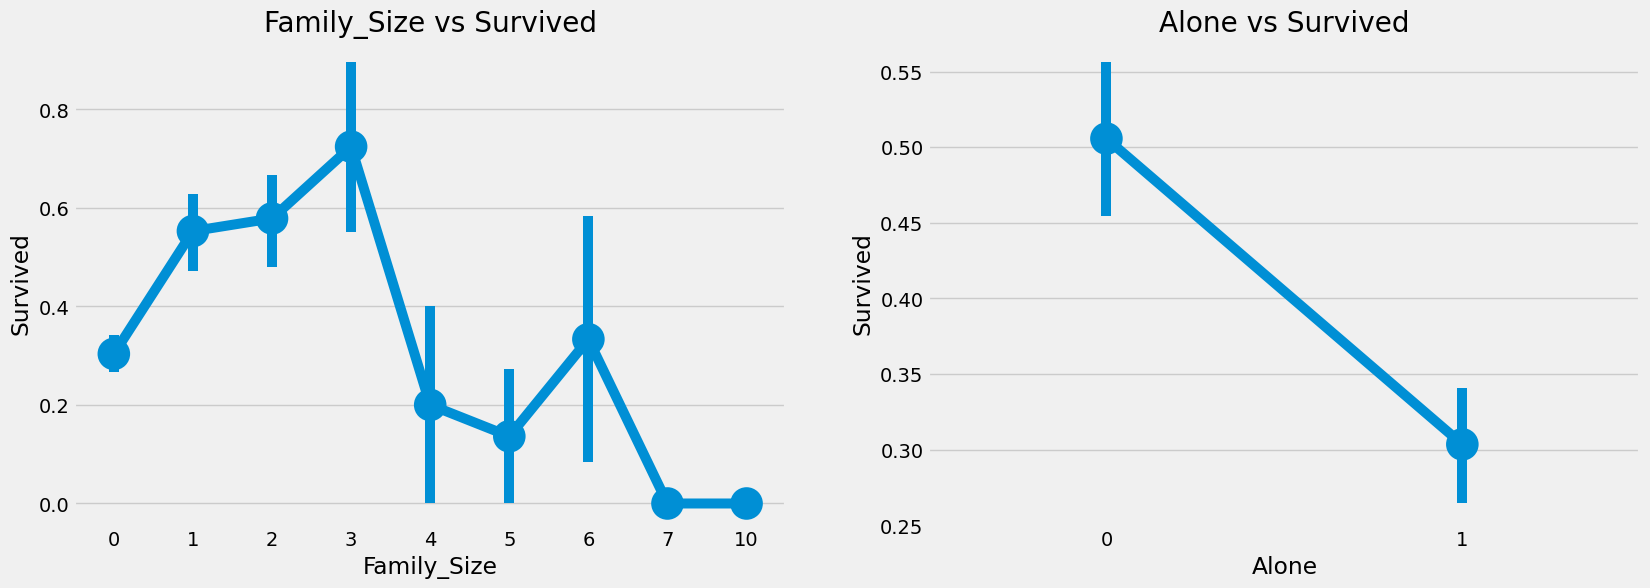

In [68]:
data["Family_Size"] = 0
data["Family_Size"] = data["Parch"] + data["SibSp"]
data["Alone"]  = 0
data.loc[data.Family_Size == 0, "Alone"] = 1

f,ax = plt.subplots(1,2,figsize=(18,6))
sns.pointplot(x="Family_Size", y= "Survived", data = data, ax=ax[0])
ax[0].set_title("Family_Size vs Survived")

sns.pointplot(x="Alone", y= "Survived", data = data, ax=ax[1])
ax[1].set_title("Alone vs Survived")

plt.close(2)
plt.close(3)
plt.show()

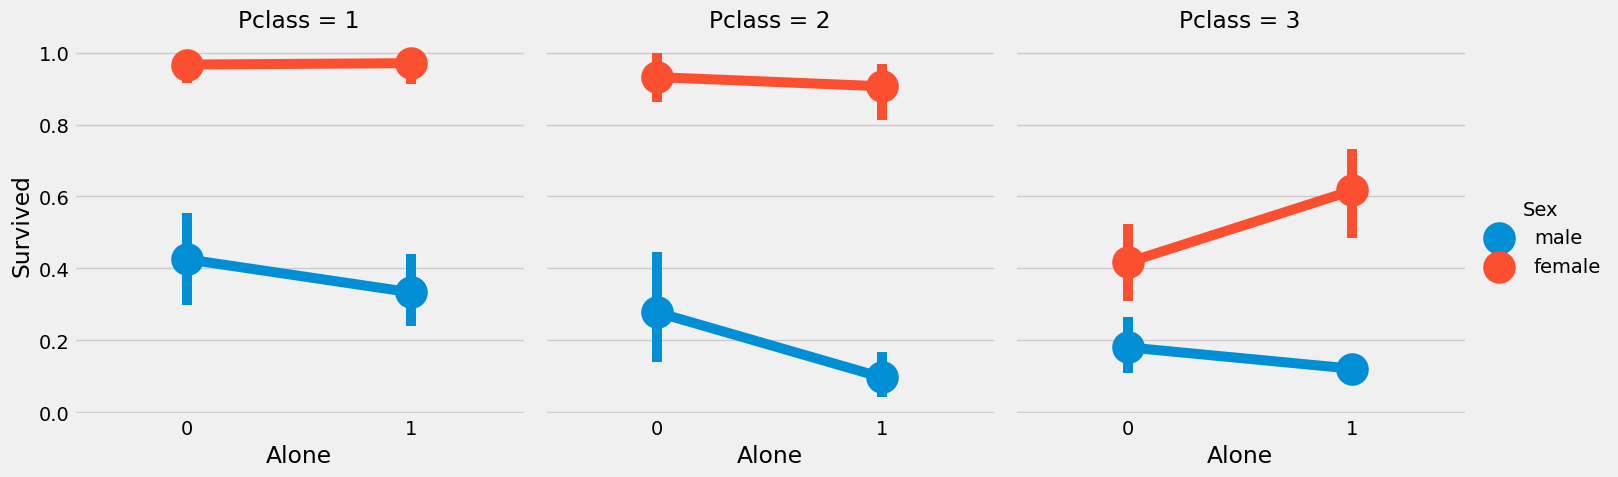

In [70]:
sns.catplot(x="Alone", y = "Survived", data = data , hue = "Sex", col = "Pclass", kind= "point")
plt.show()

In [71]:
data["Fare_Range"] = pd.qcut(data["Fare"], 4)
data.groupby(["Fare_Range"])["Survived"].mean().to_frame().style.background_gradient(cmap="summer_r")

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [72]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

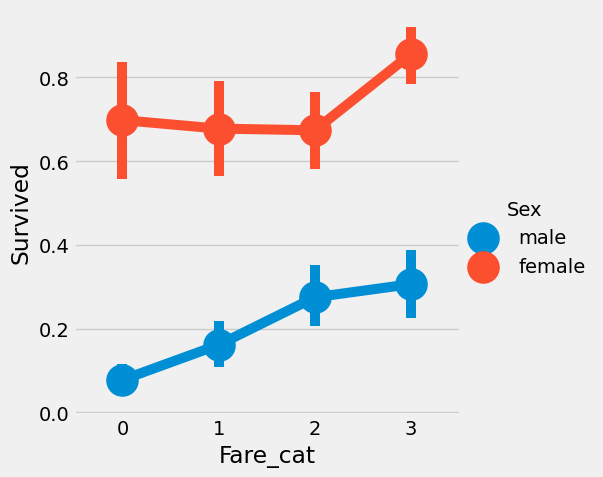

In [73]:
sns.catplot(x= "Fare_cat", y= "Survived", data= data, hue = "Sex", kind="point")
plt.show()

In [74]:
data["Sex"].replace(["male", "female"], [0,1], inplace = True)
data["Embarked"].replace(["S", "C", "Q"], [0,1,2], inplace = True)
data["Initial"].replace(["Mr", "Mrs", "Miss", "Master", "Other"], [0,1,2,3,4], inplace = True)


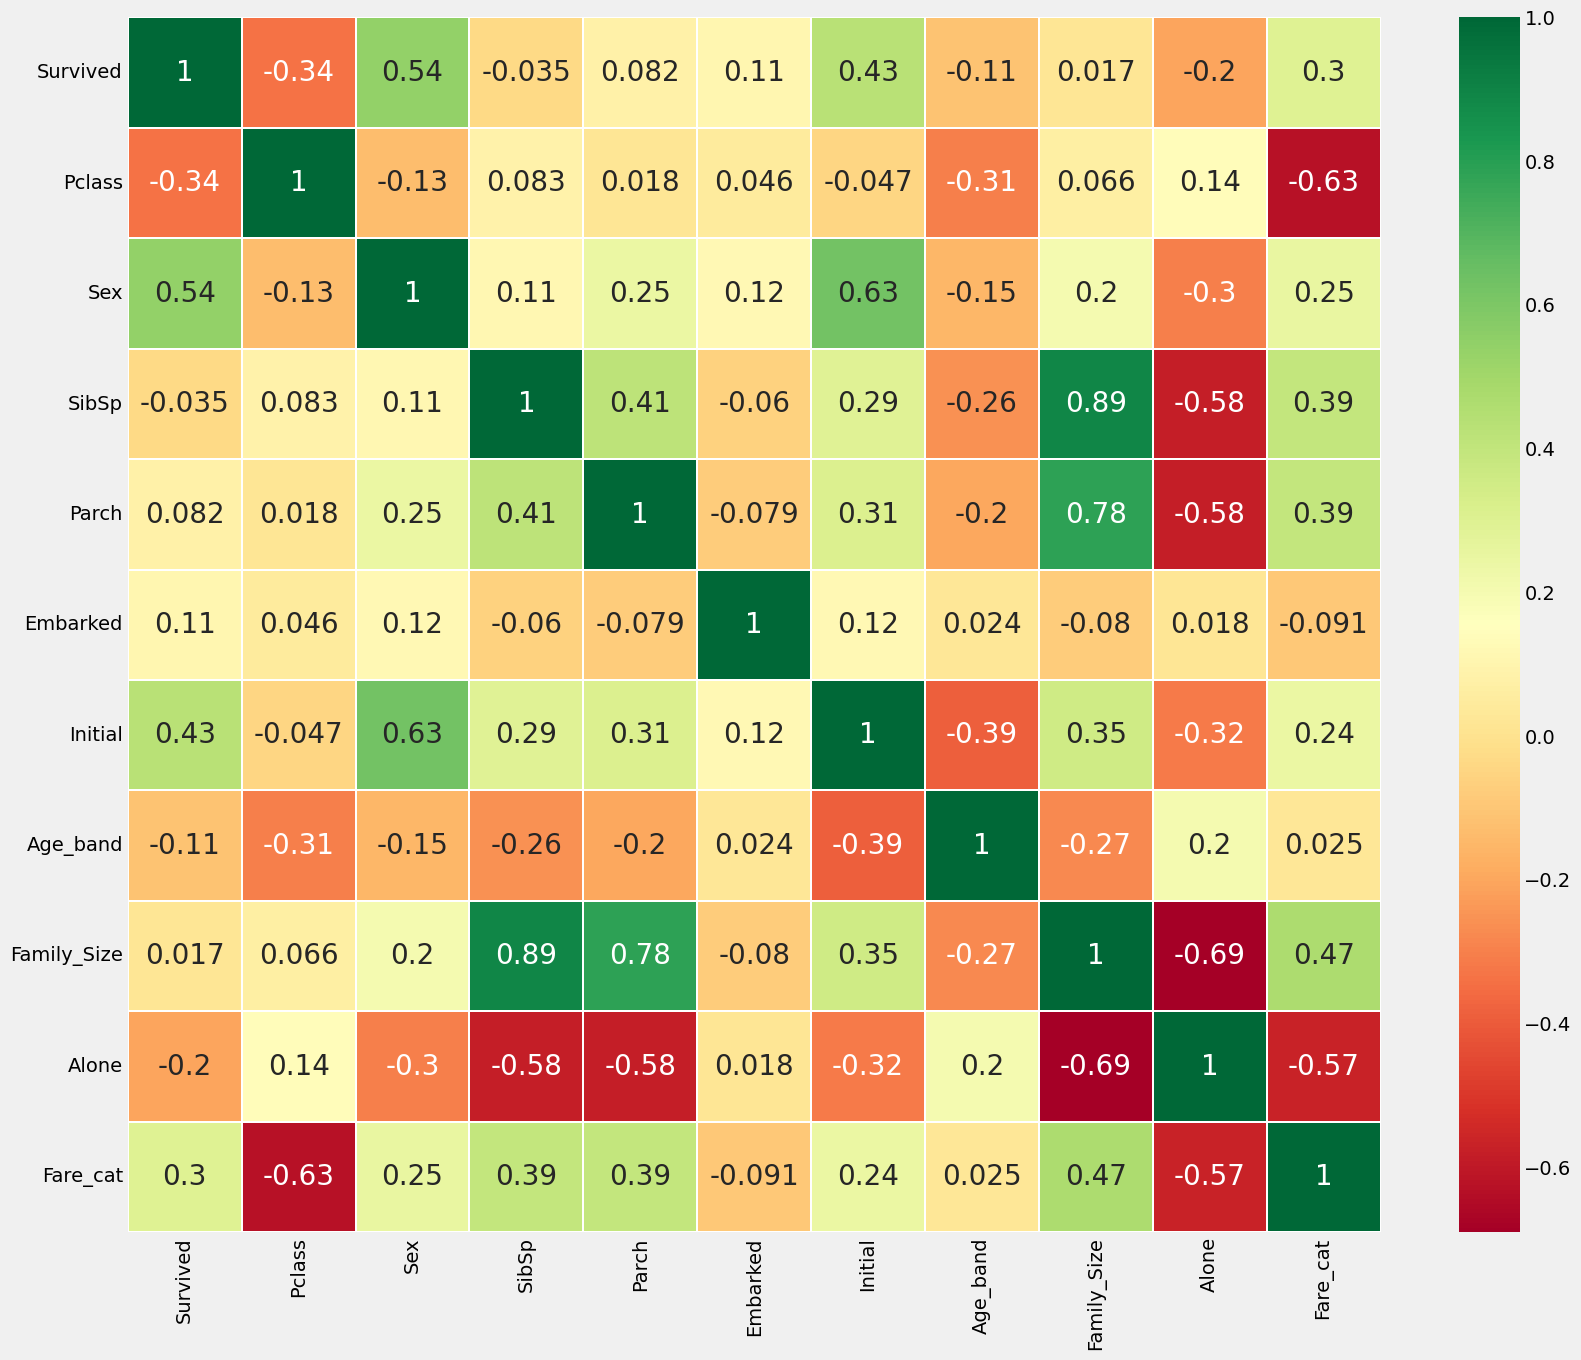

In [75]:
data.drop(["Name", "Age", "Ticket", "Fare", "Cabin", "Fare_Range", "PassengerId"], axis=1, inplace=True)
sns.heatmap(data.corr(), annot =True, cmap="RdYlGn", linewidth=0.2, annot_kws = {"size" : 20})
fig = plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize= 14)
plt.show()

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [77]:
train, test = train_test_split(data, test_size = 0.3, random_state=0, stratify=data["Survived"])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]

test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]

X = data[data.columns[1:]]
Y = data["Survived"]

In [78]:
model = svm.SVC(kernel="rbf", C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1= model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


In [79]:
model = svm.SVC(kernel="linear", C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2= model.predict(test_X)
print('Accuracy for linear SVM is ',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is  0.8171641791044776


In [80]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3= model.predict(test_X)
print('Accuracy for Logistic Regression is ',metrics.accuracy_score(prediction3,test_Y))

Accuracy for Logistic Regression is  0.8134328358208955


In [81]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('Accuracy for dt is ',metrics.accuracy_score(prediction4,test_Y))

Accuracy for dt is  0.8059701492537313


In [82]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('Accuracy for KNN is ',metrics.accuracy_score(prediction5,test_Y))

Accuracy for KNN is  0.8134328358208955


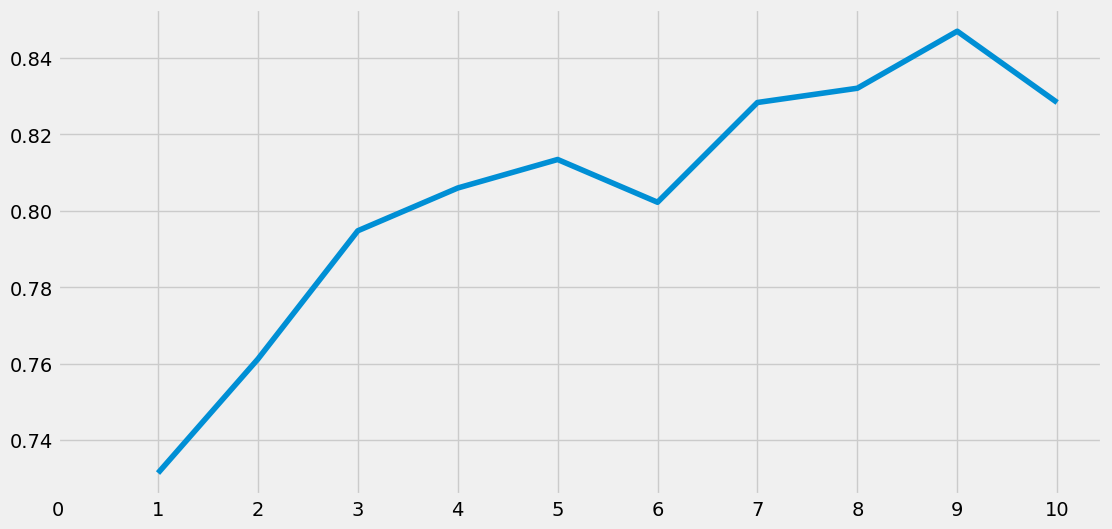

Accuracies for different values of n are: [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.83208955 0.84701493 0.82835821] with the max value as  0.8470149253731343


In [83]:
a_index = list(range(1,11))
a =pd.Series()
x = [0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
  model = KNeighborsClassifier(n_neighbors = i)
  model.fit(train_X, train_Y)
  prediction = model.predict(test_X)
  a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))

plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

In [84]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('Accuracy for NavieBayes is ',metrics.accuracy_score(prediction6,test_Y))

Accuracy for NavieBayes is  0.8134328358208955


In [88]:
model = RandomForestClassifier(n_estimators = 10)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('Accuracy for rfc is ',metrics.accuracy_score(prediction7,test_Y))

Accuracy for rfc is  0.8059701492537313


In [91]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

kfold = KFold(n_splits = 10, random_state=22, shuffle = True)
xyz = []
accuracy = []
std = []
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']

models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]

for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.035630
Decision Tree,0.802484,0.046306
Naive Bayes,0.795843,0.054861
Random Forest,0.818227,0.043799


<Axes: >

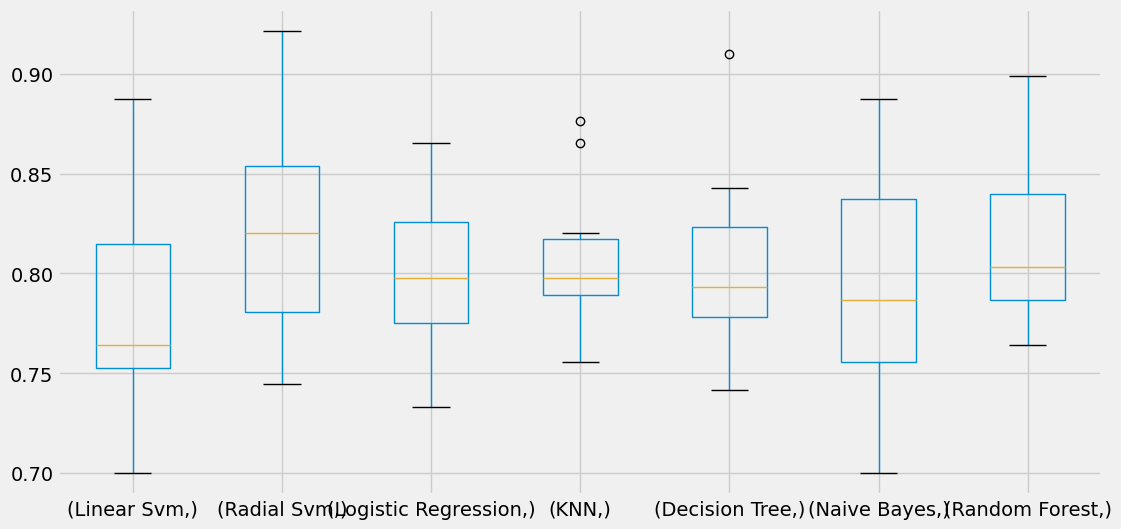

In [92]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

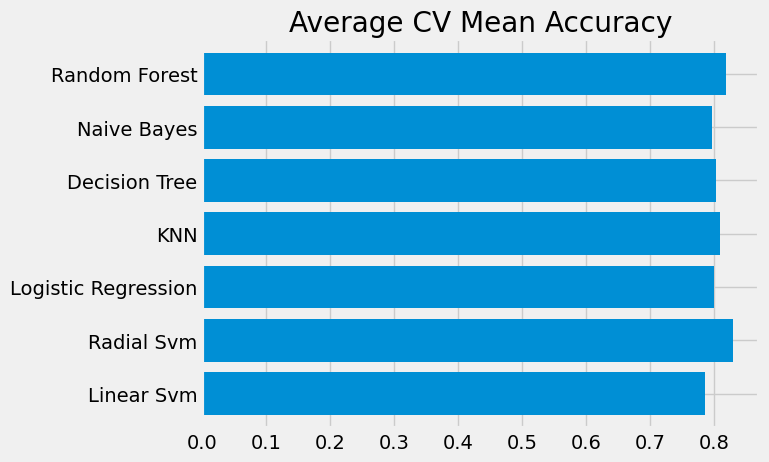

In [93]:
new_models_dataframe2["CV Mean"].plot.barh(width = 0.8)
plt.title("Average CV Mean Accuracy")
flg = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

In [94]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


In [95]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)
